<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/17%20_20%20CIFAR_images_VGG_style_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# LIBARIES

from keras.datasets import cifar10
# libraries for pr-processing and plotting
import numpy as np
import tensorflow as tf
from numpy import asarray
import matplotlib.pyplot as plt


# for plotting model  and transfer learning
from keras import utils
from keras.layers import Input
#Libraries for CNN
from keras.models import Sequential , Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, Dropout
# Optimizers

from tensorflow.keras.optimizers import SGD , Adam

In [7]:
(trainX, trainY), (testX, testY) = cifar10.load_data() 


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
(trainX.shape, trainY.shape), (testX.shape, testY.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

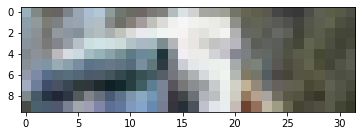

In [ ]:
plt.imshow(trainX[1][0:32][0:10])
plt.show()

In [ ]:
trainX, testX = trainX.astype('float32')/255.0, testX.astype('float32')/255.0

## Define functions :
1 - load_dataset cifar10 :  just load data, in train and test features/labels and convert labels to cat


2 - prep_pixels : normalize the feautres between 0 and 1 and change to float

3 - define_model

4 - plot_diagnostics i.e loss vs val_loss and accuracy vs validation_accuracy

5 - run_model_harness which fits model (with history) ad evlauate model (to get accuracy) and plot_diagnostics


In [4]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data() 
    trainY =tf.keras.utils.to_categorical(trainY)
    testY =tf.keras.utils.to_categorical(testY)
    return (trainX, trainY), (testX, testY)

# for feature pr-processing .     
def prep_pixels(trainX, testX):
    trainX1=trainX.astype('float32')/255.0 
    testX1=testX.astype('float32')/255.0 
    return (trainX1, testX1)

def base_model():
    model=Sequential()
    model.add(Conv2D(filters=64 , kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    
    model.add(Conv2D(filters=128 , kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))

    model.add(Flatten())
    model.add(Dense(units=200,activation='relu'))
    model.add(Dense(units=10,activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model


def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(range(0,10),history['loss'],color='green',label='Training Loss')
    axx[0].plot(range(0,10),history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(range(0,10),history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(range(0,10),history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()


def run_model_harness():
    (trainX, trainY), (testX, testY)= load_dataset()
    (trainX, testX)=prep_pixels(trainX, testX)
    model=base_model()
    history=model.fit(x=trainX,y=trainY,batch_size=64,epochs=10 , validation_data=(testX, testY),verbose=1)
    
    losses , accuracy =model.evaluate(testX, testY)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))
    
    history1=history.history
    plot_diagnostics(history1)
    return history1 , model


Epoch 1/10
625/625 [==============================] - 9s 13ms/step - loss: 1.4449 - accuracy: 0.4851 - val_loss: 1.2046 - val_accuracy: 0.5819
Epoch 2/10
625/625 [==============================] - 8s 12ms/step - loss: 1.0715 - accuracy: 0.6268 - val_loss: 1.0173 - val_accuracy: 0.6434
Epoch 3/10
625/625 [==============================] - 8s 12ms/step - loss: 0.9219 - accuracy: 0.6792 - val_loss: 0.9422 - val_accuracy: 0.6726
Epoch 4/10
625/625 [==============================] - 8s 12ms/step - loss: 0.8193 - accuracy: 0.7164 - val_loss: 0.9071 - val_accuracy: 0.6893
Epoch 5/10
625/625 [==============================] - 8s 12ms/step - loss: 0.7257 - accuracy: 0.7487 - val_loss: 0.8767 - val_accuracy: 0.7062
Epoch 6/10
625/625 [==============================] - 8s 12ms/step - loss: 0.6412 - accuracy: 0.7774 - val_loss: 0.8734 - val_accuracy: 0.7053
Epoch 7/10
625/625 [==============================] - 8s 12ms/step - loss: 0.5665 - accuracy: 0.8040 - val_loss: 0.8964 - val_accuracy: 0.7127

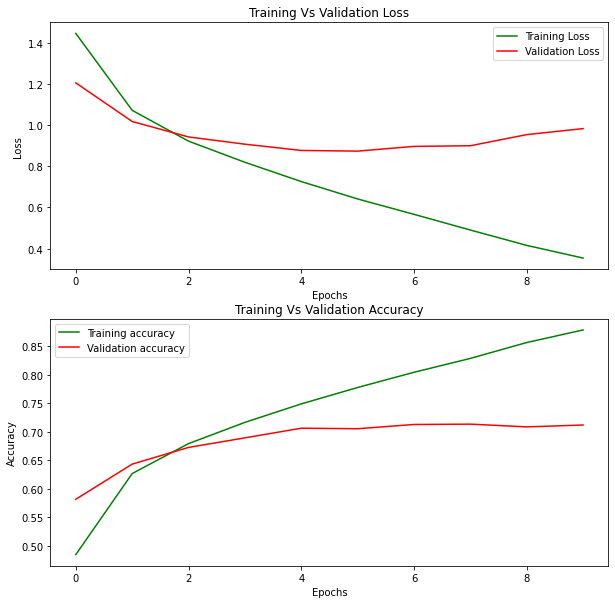

In [ ]:
run_model_harness()

# **Improving Model using VGG-Style**

Make a 3 block CNN similar to VGG-style which involves CNN layers followed by Pooling with padding='uniform' and kernel_initializer='he_uniform
1.   Increasing Conv2d of 32 , 64,128 with kernel-size=3x3 and 'relu' activation
2.   Each Conv2d followed by Max pooling of 2x2

1.   Finally Dense 128 and 10 (of course after Flatten layer)





In [ ]:
def base_model():
  model=Sequential()
  # 1 Conv2d-Maxpool
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,input_shape=(32,32,3),padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # 2 Conv2d-Maxpool
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # 3 Conv2d-Maxpool
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # Final Desne layers
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

Epoch 1/10
625/625 [==============================] - 10s 14ms/step - loss: 1.3560 - accuracy: 0.5190 - val_loss: 1.1128 - val_accuracy: 0.6116
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 0.9617 - accuracy: 0.6649 - val_loss: 0.9928 - val_accuracy: 0.6505
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 0.7851 - accuracy: 0.7268 - val_loss: 0.8824 - val_accuracy: 0.6936
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.6480 - accuracy: 0.7749 - val_loss: 0.8683 - val_accuracy: 0.7077
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.5230 - accuracy: 0.8186 - val_loss: 0.9015 - val_accuracy: 0.7074
Epoch 6/10
625/625 [==============================] - 7s 12ms/step - loss: 0.4135 - accuracy: 0.8536 - val_loss: 0.9717 - val_accuracy: 0.7146
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 0.3254 - accuracy: 0.8861 - val_loss: 1.0809 - val_accuracy: 0.700

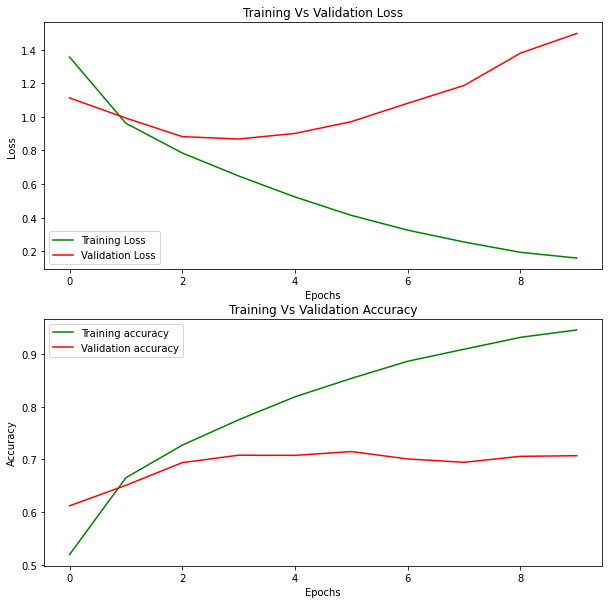

In [ ]:
run_model_harness()

# Improving the VGG style model



1.   Make double ConvD layers prior to each Maxpooling
2.   Add dropout=0.2 after each block



In [ ]:
def base_model():
  model=Sequential()
  # 1 Conv2d-Maxpool
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,input_shape=(32,32,3),padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.2))
  # 2 Conv2d-Maxpool
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Dropout(0.2))
  # 3 Conv2d-Maxpool
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Dropout(0.2))
  # Final Desne layers
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(history['loss'],color='green',label='Training Loss')
    axx[0].plot(history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()

In [ ]:

def run_model_harness():
    (trainX, trainY), (testX, testY)= load_dataset()
    (trainX, testX)=prep_pixels(trainX, testX)
    model=base_model()
    history=model.fit(x=trainX,y=trainY,batch_size=100,epochs=15 , validation_data=(testX, testY),verbose=1)
    
    losses , accuracy =model.evaluate(testX, testY)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))
    
    history1=history.history
    plot_diagnostics(history1)
    return history1 , model

Epoch 1/15
500/500 [==============================] - 15s 29ms/step - loss: 1.8306 - accuracy: 0.3982 - val_loss: 1.3322 - val_accuracy: 0.5293
Epoch 2/15
500/500 [==============================] - 14s 29ms/step - loss: 1.2404 - accuracy: 0.5635 - val_loss: 1.1453 - val_accuracy: 0.6042
Epoch 3/15
500/500 [==============================] - 14s 28ms/step - loss: 1.0598 - accuracy: 0.6265 - val_loss: 1.0801 - val_accuracy: 0.6417
Epoch 4/15
500/500 [==============================] - 14s 29ms/step - loss: 0.9535 - accuracy: 0.6684 - val_loss: 0.8848 - val_accuracy: 0.6954
Epoch 5/15
500/500 [==============================] - 14s 28ms/step - loss: 0.8764 - accuracy: 0.6975 - val_loss: 0.8752 - val_accuracy: 0.7032
Epoch 6/15
500/500 [==============================] - 14s 29ms/step - loss: 0.8121 - accuracy: 0.7196 - val_loss: 0.8997 - val_accuracy: 0.6930
Epoch 7/15
500/500 [==============================] - 14s 28ms/step - loss: 0.7762 - accuracy: 0.7290 - val_loss: 0.7940 - val_accuracy:

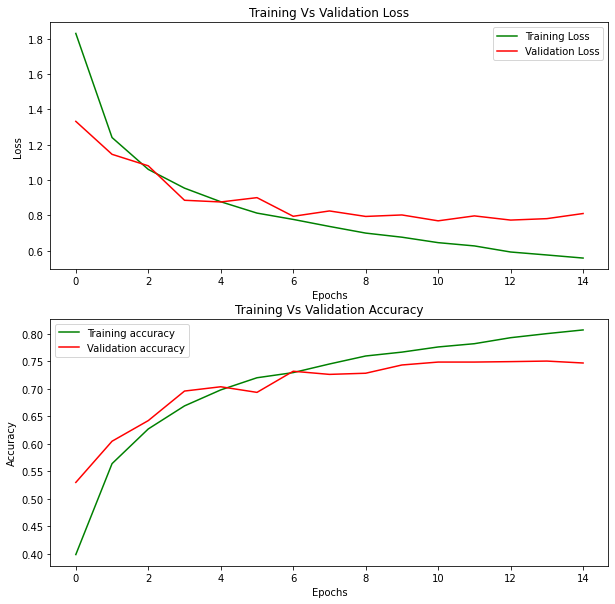

In [ ]:
#batch size=100
history1 , model=run_model_harness() 

## Saving Model
### 1- Saving Model and History

In [ ]:
# saving model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/CIFAR1.h5'
# saving model
model.save(model_path,overwrite=True)

In [ ]:
# saving model history 
import json

# # Save it under the form of a json file
history_path=path +'/CIFAR_history1.json'

json.dump(str(history1), open(history_path, 'w'))

## Plotting from the saved History

In [ ]:
path='/content/drive/MyDrive/20210309_Files/'
history_path=path +'/CIFAR_history1.json'
history1= json.load(open(history_path, 'r'))

TypeError: ignored

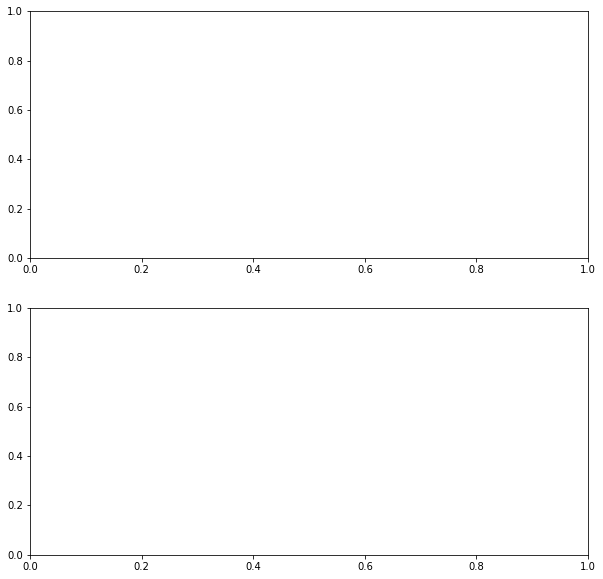

In [ ]:
fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
axx[0].plot(range(0,10),history1['loss'],color='green',label='Training Loss')
axx[0].plot(range(0,10),history1['val_loss'], color='red' ,label='Validation Loss')
axx[0].set_title('Training Vs Validation Loss')
axx[0].set_ylabel('Loss')
axx[0].set_xlabel('Epochs')
axx[0].legend()

axx[1].plot(range(0,10),history1['accuracy'],color='green',label='Training accuracy')
axx[1].plot(range(0,10),history1['val_accuracy'], color='red' ,label='Validation accuracy')
axx[1].set_title('Training Vs Validation Accuracy')
axx[1].set_ylabel('Accuracy')
axx[1].set_xlabel('Epochs')
axx[1].legend()

plt.show()

## **Why error in plotting loaded History in json format?**

In [ ]:
type(history1)

str

In [ ]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history2=ast.literal_eval(history1)

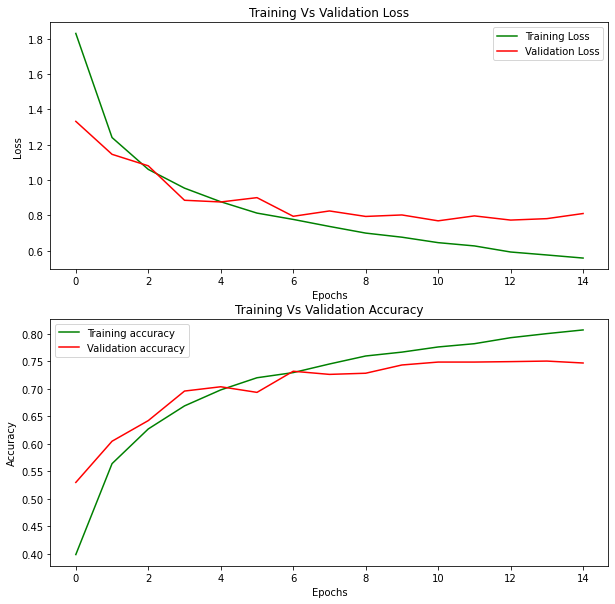

In [ ]:
fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
axx[0].plot(history2['loss'],color='green',label='Training Loss')
axx[0].plot(history2['val_loss'], color='red' ,label='Validation Loss')
axx[0].set_title('Training Vs Validation Loss')
axx[0].set_ylabel('Loss')
axx[0].set_xlabel('Epochs')
axx[0].legend()

axx[1].plot(history2['accuracy'],color='green',label='Training accuracy')
axx[1].plot(history2['val_accuracy'], color='red' ,label='Validation accuracy')
axx[1].set_title('Training Vs Validation Accuracy')
axx[1].set_ylabel('Accuracy')
axx[1].set_xlabel('Epochs')
axx[1].legend()

plt.show()

# Using Model Evalutation (only) on the Test Data
This time ,no training is required. Simply load the previously saved model (that was trainined using the training data)

In [ ]:
(trainX, trainY), (testX, testY)= load_dataset()
(trainX, testX)=prep_pixels(trainX, testX)

In [ ]:
losses , accuracy =model.evaluate(testX, testY)
print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))

313/313 [==============================] - 3s 8ms/step - loss: 0.8097 - accuracy: 0.7464
Final modal accuracy=74.6399998664856 loss=0.8096747994422913


# Predictions


```
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
```



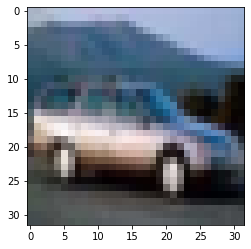

In [ ]:
plt.imshow(trainX[4])
plt.show()

In [ ]:
image_path='/content/drive/MyDrive/20210309_Datasets/white car.png'
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
model=load_model(filepath='/content/drive/MyDrive/20210309_Files/CIFAR1.h5')

In [ ]:
image=load_img(path=image_path,target_size=(32,32,3))


In [ ]:
image=np.array(image)
image.shape

(32, 32, 3)

In [ ]:
image=image.reshape(1,32,32,3)

In [ ]:
image=image.astype('float32')/255.0
prediction=model.predict(image)
prediction

array([[1.8439794e-01, 1.0419449e-02, 9.0912050e-03, 8.2892096e-03,
        8.0962509e-02, 2.2248518e-04, 1.6813735e-03, 1.2872267e-01,
        1.5864888e-02, 5.6034833e-01]], dtype=float32)

In [ ]:
prediction.argmax()

9

he class labels and their standard associated
integer values are listed below.
❼ 0: airplane
❼ 1: automobile
❼ 2: bird
❼ 3: cat
❼ 4: deer
❼ 5: dog
❼ 6: frog
❼ 7: horse
❼ 8: ship
❼ 9: truck

The above prediction is not right since our model still has less accuracy

# **CIFR Data Augmentation**

In [5]:
from numpy import asarray
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import utils

## Steps ImageDataGenerator Augmentation

1.   make ImageDataGenerator object
2.   flow this object through train X and Y in some batch_size
3.   Fit this generator flow object in model.fit with steps_size=samples/batch_size

 Note : (width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
gen_object=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True )

generator_flow_object=gen_object.flow(trainX,trainY,batch_size=64)

#model.fit(generator_flow_object, steps_per_epoch=int(trainX.shape[0]/64), validation_data=(testX,testY),verbose=1)


In [19]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data() 
    trainY =tf.keras.utils.to_categorical(trainY)
    testY =tf.keras.utils.to_categorical(testY)
    return (trainX, trainY), (testX, testY)

# for feature pr-processing .     
def prep_pixels(trainX, testX):
    trainX1=trainX.astype('float32')/255.0 
    testX1=testX.astype('float32')/255.0 
    return (trainX1, testX1)

def base_model():
  model=Sequential()
  # 1 Conv2d-Maxpool
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,input_shape=(32,32,3),padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.2))
  # 2 Conv2d-Maxpool
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Dropout(0.2))
  # 3 Conv2d-Maxpool
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Dropout(0.2))
  # Final Desne layers
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(range(0,30),history['loss'],color='green',label='Training Loss')
    axx[0].plot(range(0,30),history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(range(0,30),history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(range(0,30),history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()


def run_model_harness():
    (trainX, trainY), (testX, testY)= load_dataset()
    (trainX, testX)=prep_pixels(trainX, testX)
    model=base_model()
    image_data_object=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
    image_data_object_flow=image_data_object.flow(trainX,trainY, batch_size=64)
    history=model.fit(image_data_object_flow,steps_per_epoch=int(trainX.shape[0]/64) , batch_size=100,epochs=30 , validation_data=(testX, testY),verbose=1)
    
    losses , accuracy =model.evaluate(testX, testY)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))
    
    history1=history.history
    plot_diagnostics(history1)
    return history1 , model


Epoch 1/30
781/781 [==============================] - 36s 45ms/step - loss: 1.5201 - accuracy: 0.4505 - val_loss: 1.2004 - val_accuracy: 0.5709
Epoch 2/30
781/781 [==============================] - 35s 45ms/step - loss: 1.1809 - accuracy: 0.5833 - val_loss: 0.9925 - val_accuracy: 0.6576
Epoch 3/30
781/781 [==============================] - 35s 44ms/step - loss: 1.0644 - accuracy: 0.6255 - val_loss: 0.9603 - val_accuracy: 0.6633
Epoch 4/30
781/781 [==============================] - 35s 44ms/step - loss: 0.9911 - accuracy: 0.6539 - val_loss: 0.8813 - val_accuracy: 0.6925
Epoch 5/30
781/781 [==============================] - 35s 44ms/step - loss: 0.9279 - accuracy: 0.6755 - val_loss: 0.8651 - val_accuracy: 0.6981
Epoch 6/30
781/781 [==============================] - 34s 44ms/step - loss: 0.8869 - accuracy: 0.6921 - val_loss: 0.8078 - val_accuracy: 0.7251
Epoch 7/30
781/781 [==============================] - 35s 45ms/step - loss: 0.8468 - accuracy: 0.7050 - val_loss: 0.7878 - val_accuracy:

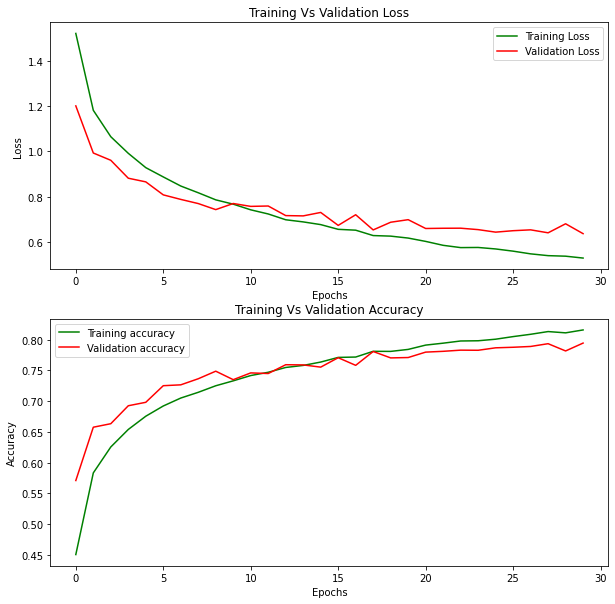

In [20]:
history1 , model=run_model_harness()

## saving model and history

In [22]:
# saving  history1 , model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/CIFAR1_augmented.h5'
# saving model
model.save(model_path,overwrite=True)

# saving model history 
import json

# # Save it under the form of a json file
history_path=path +'/CIFAR1_augmented_history1.json'

json.dump(str(history1), open(history_path, 'w'))


In [23]:
## loading history

path='/content/drive/MyDrive/20210309_Files/'
history_path=path +'/CIFAR1_augmented_history1.json'
history1= json.load(open(history_path, 'r'))

# The loaded history is in String format.Converting it back to
# dictionary
import ast
history2=ast.literal_eval(history1)

from keras.models import load_model
model=load_model(filepath='/content/drive/MyDrive/20210309_Files/CIFAR1_augmented.h5')

# **CIFR batch normalization**

1. Already used 2 sets of Conv layers (32,64,128) followed by a Max-Pool & dropput layer

2. Just add Batch Normalization after each member of the Conv layer set

3. Also add Batch Normalizatoin after Dense layer

Note :
 
Batch normalization is more often done before the activation function. 
 
Since the goal here is to normalize the weights and bias of the next layer, some do it after the activation function as well (its also faster)


In [24]:
from keras.layers import BatchNormalization

In [27]:
def base_model():
  model=Sequential()
  # 1 Conv2d-Maxpool
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,input_shape=(32,32,3),padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # 2 Conv2d-Maxpool
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # 3 Conv2d-Maxpool
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # Final Desne layers
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [32]:
def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(range(0,100),history['loss'],color='green',label='Training Loss')
    axx[0].plot(range(0,100),history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(range(0,100),history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(range(0,100),history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()


def run_model_harness():
    (trainX, trainY), (testX, testY)= load_dataset()
    (trainX, testX)=prep_pixels(trainX, testX)
    model=base_model()
    image_data_object=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
    image_data_object_flow=image_data_object.flow(trainX,trainY, batch_size=64)
    history=model.fit(image_data_object_flow,steps_per_epoch=int(trainX.shape[0]/64) , batch_size=100,epochs=100 , validation_data=(testX, testY),verbose=1)
    
    losses , accuracy =model.evaluate(testX, testY)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))
    
    history1=history.history
    plot_diagnostics(history1)
    return history1 , model


Epoch 1/100
781/781 [==============================] - 46s 57ms/step - loss: 1.4556 - accuracy: 0.4822 - val_loss: 1.2437 - val_accuracy: 0.5833
Epoch 2/100
781/781 [==============================] - 44s 56ms/step - loss: 1.1351 - accuracy: 0.6033 - val_loss: 1.0230 - val_accuracy: 0.6542
Epoch 3/100
781/781 [==============================] - 44s 56ms/step - loss: 1.0181 - accuracy: 0.6460 - val_loss: 0.9488 - val_accuracy: 0.6809
Epoch 4/100
781/781 [==============================] - 44s 56ms/step - loss: 0.9515 - accuracy: 0.6660 - val_loss: 0.8660 - val_accuracy: 0.7074
Epoch 5/100
781/781 [==============================] - 44s 57ms/step - loss: 0.8936 - accuracy: 0.6875 - val_loss: 0.8179 - val_accuracy: 0.7300
Epoch 6/100
781/781 [==============================] - 44s 56ms/step - loss: 0.8552 - accuracy: 0.7039 - val_loss: 0.7728 - val_accuracy: 0.7391
Epoch 7/100
781/781 [==============================] - 43s 56ms/step - loss: 0.8219 - accuracy: 0.7130 - val_loss: 0.7785 - val_ac

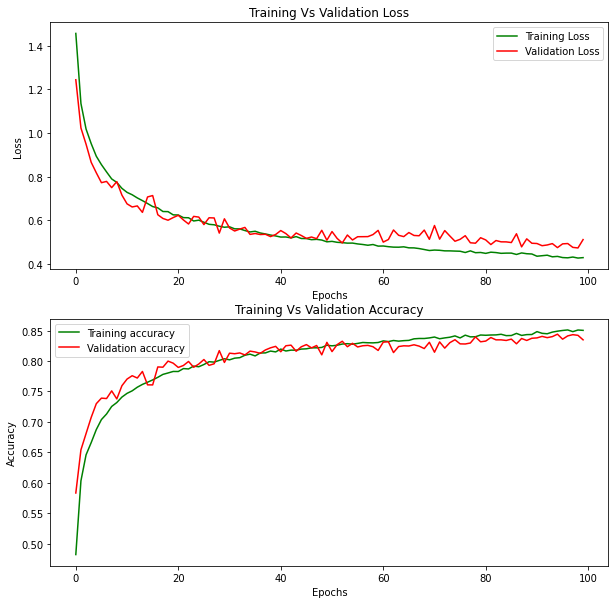

In [33]:
history3 , model3 =run_model_harness()

In [34]:
# saving  history1 , model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/CIFAR1_augm_norm100.h5'
# saving model
model3.save(model_path,overwrite=True)

# saving model history 
import json

# # Save it under the form of a json file
history_path=path +'/CIFAR1_augm_norm100_history1.json'

json.dump(str(history1), open(history_path, 'w'))


In [ ]:
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

image = load_img(image_path, target_size=(224,224))
# # convert the image pixels to a numpy array
image = np.array(image)
# # reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label1 = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label1[1], label1[2]*100))

digital_clock (39.83%)
